In [1]:
# Se cargan las funciones de Keras
import tensorflow as tf
print(tf.__version__)

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import concatenate
from keras.layers import Lambda

from IPython.display import Image
import os

2024-03-12 00:50:20.064586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0


In [16]:
print("Current working directory:", os.getcwd())

Current working directory: /home/jesus/projects/neural_network_course/task_5


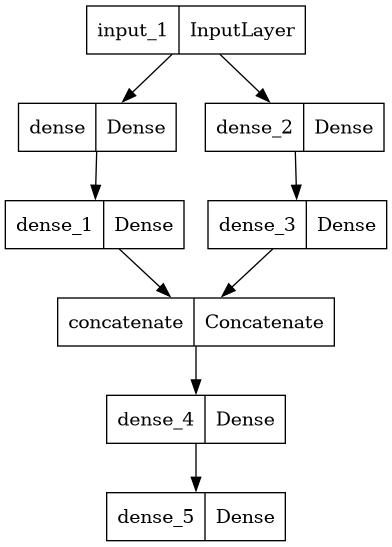

In [2]:
# ------------------------
# Una entrada, dos ramas

# input layer
input = Input(shape=(20))

# first feature extractor
D_A1 = Dense(64, activation = 'relu')(input)
D_A2 = Dense(64, activation = 'relu')(D_A1)

# first feature extractor
D_B1 = Dense(64, activation = 'relu')(input)
D_B2 = Dense(64, activation = 'relu')(D_B1)

# merge feature extractors
merge = concatenate([D_A2, D_B2])

# interpretation layer
m1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation = 'linear')(m1)

model = Model(inputs=input, outputs=output)

# summarize layers
#print(model.summary())

# plot graph
plot_model(model)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 20)]                 0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 64)                   1344      ['input_2[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 64)                   4160      ['dense_6[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 64)                   4160      ['dense_7[0][0]']             
                                                                                            

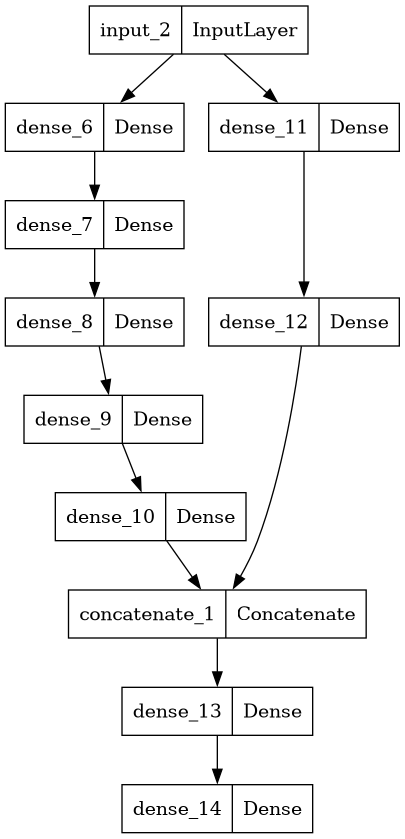

In [3]:
# ------------------------
# Una entrada, dos ramas de distinta longitud

# input layer
input = Input(shape=(20))

# first feature extractor
D_A1 = Dense(64, activation = 'relu')(input)
D_A2 = Dense(64, activation = 'relu')(D_A1)
D_A3 = Dense(64, activation = 'relu')(D_A2)
D_A4 = Dense(64, activation = 'relu')(D_A3)
D_A5 = Dense(64, activation = 'relu')(D_A4)


# first feature extractor
D_B1 = Dense(64, activation = 'relu')(input)
D_B2 = Dense(64, activation = 'relu')(D_B1)

# merge feature extractors
merge = concatenate([D_A5, D_B2])

# interpretation layer
m1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation = 'linear')(m1)

model = Model(inputs=input, outputs=output)

# summarize layers
print(model.summary())

# plot graph
plot_model(model)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 20)]                 0         []                            
                                                                                                  
 lambda (Lambda)             (None, 10)                   0         ['input_3[0][0]']             
                                                                                                  
 lambda_1 (Lambda)           (None, 10)                   0         ['input_3[0][0]']             
                                                                                                  
 dense_15 (Dense)            (None, 64)                   704       ['lambda[0][0]']              
                                                                                            

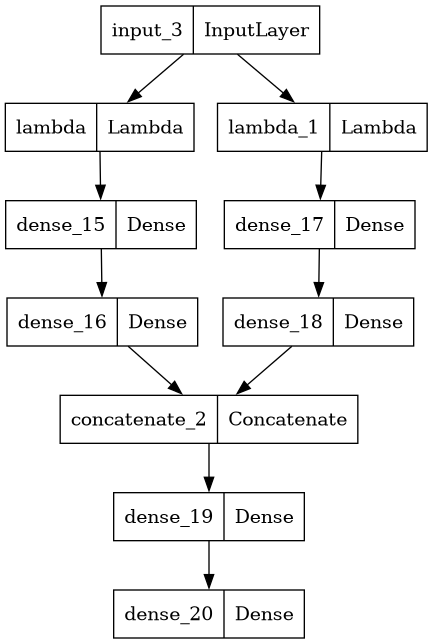

In [4]:
# ------------------------
# Una entrada que se parte en dos
# la mitad del imput va por una rama y la otra mitad por la otra

# input layer
input = Input(shape=(20))

# first feature extractor
inputA = Lambda(lambda x: x[:, 0:10])(input)
D_A1 = Dense(64, activation = 'relu')(inputA)
D_A2 = Dense(64, activation = 'relu')(D_A1)

# first feature extractor
inputB = Lambda(lambda x: x[:, 10:20])(input)
D_B1 = Dense(64, activation = 'relu')(inputB)
D_B2 = Dense(64, activation = 'relu')(D_B1)

# merge feature extractors
merge = concatenate([D_A2, D_B2])

# interpretation layer
m1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation = 'linear')(m1)

model = Model(inputs=input, outputs=output)

# summarize layers
print(model.summary())

# plot graph
plot_model(model)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense_21 (Dense)            (None, 64)                   704       ['input_4[0][0]']             
                                                                                                  
 dense_23 (Dense)            (None, 64)                   704       ['input_5[0][0]']             
                                                                                            

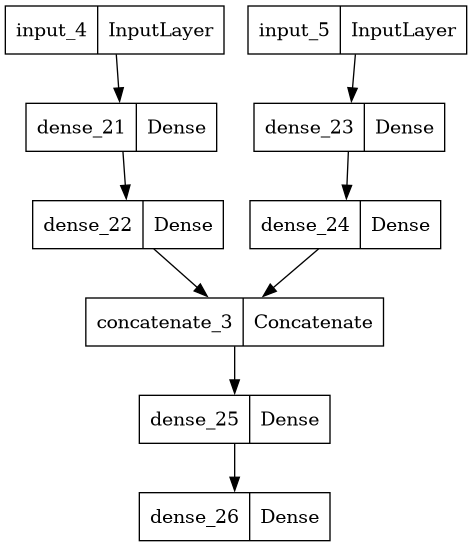

In [5]:
# ------------------------
# Dos entradas, dos ramas

# input layer
inputA = Input(shape=(10))
inputB = Input(shape=(10))

# first feature extractor
D_A1 = Dense(64, activation = 'relu')(inputA)
D_A2 = Dense(64, activation = 'relu')(D_A1)

# first feature extractor
D_B1 = Dense(64, activation = 'relu')(inputB)
D_B2 = Dense(64, activation = 'relu')(D_B1)

# merge feature extractors
merge = concatenate([D_A2, D_B2])

# interpretation layer
m1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation = 'linear')(m1)

model = Model(inputs=[inputA, inputB], outputs=output)

# summarize layers
print(model.summary())

# plot graph
plot_model(model)